In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import *
from sklearn import preprocessing
from keras.layers import *
import numpy as np
tf.config.run_functions_eagerly(True)

In [2]:
df = pd.read_csv("philly.csv")
df.drop('Sunrise', inplace=True, axis=1)
df.drop('Sunset', inplace=True, axis=1)
df.drop('Sky Conditions', inplace=True, axis=1)
df.drop('Pressure Change', inplace=True, axis=1)
df.drop('Pressure Tendency', inplace=True, axis=1)
df['Precipitation'] = df["Precipitation"].fillna(0)
df.head()

,DATE,Dry Bulb Temp,Altitude,Dew Point Temp,Precipitation,Humidity,Station Pressure,Visibility,Wet Bulb Temp,Wind Direction,Wind Speed
0,01.01.2018 00:54,10.0,30.41,-5.0,0.0,50.0,30.38,10.00,7.0,300.0,6.0
1,01.01.2018 01:00,10.0,NaN,-5.0,0.0,50.0,30.35,9.94,7.0,300.0,6.0
2,01.01.2018 01:54,9.0,30.42,-5.0,0.0,52.0,30.39,10.00,7.0,320.0,7.0
3,01.01.2018 02:54,10.0,30.42,-6.0,0.0,48.0,30.39,10.00,7.0,310.0,8.0
4,01.01.2018 03:54,9.0,30.42,-6.0,0.0,50.0,30.39,10.00,6.0,310.0,7.0


In [3]:
df.count()

DATE                40590
Dry Bulb Temp       39447
Altitude            35099
Dew Point Temp      39445
Precipitation       40590
Humidity            39445
Station Pressure    39124
Visibility          39452
Wet Bulb Temp       39122
Wind Direction      38391
Wind Speed          39448
dtype: int64

In [4]:
keys = [
    "Dry Bulb Temp",
    "Altitude",
    "Dew Point Temp",
    "Precipitation",
    "Humidity",
    "Station Pressure",
    "Visibility",
    "Wet Bulb Temp",
    "Wind Direction",
    "Wind Speed",
]

labels = [
    "Tdry (degF)",
    "Tdew (degF)",
    "alt",
    "rain (in)",
    "hum (%)",
    "p (Hg)",
    "vis (mi)",
    "Twet (degF)",
    "wDir (deg)",
    "wSpeed (mph)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]
dateTime_key = "DATE"

In [5]:
df = df.dropna(how='any',axis=0)
df.count()

DATE                33827
Dry Bulb Temp       33827
Altitude            33827
Dew Point Temp      33827
Precipitation       33827
Humidity            33827
Station Pressure    33827
Visibility          33827
Wet Bulb Temp       33827
Wind Direction      33827
Wind Speed          33827
dtype: int64

In [6]:
df.dtypes

DATE                 object
Dry Bulb Temp       float64
Altitude            float64
Dew Point Temp      float64
Precipitation       float64
Humidity            float64
Station Pressure    float64
Visibility          float64
Wet Bulb Temp       float64
Wind Direction      float64
Wind Speed          float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33827 entries, 0 to 40587
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              33827 non-null  object 
 1   Dry Bulb Temp     33827 non-null  float64
 2   Altitude          33827 non-null  float64
 3   Dew Point Temp    33827 non-null  float64
 4   Precipitation     33827 non-null  float64
 5   Humidity          33827 non-null  float64
 6   Station Pressure  33827 non-null  float64
 7   Visibility        33827 non-null  float64
 8   Wet Bulb Temp     33827 non-null  float64
 9   Wind Direction    33827 non-null  float64
 10  Wind Speed        33827 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.1+ MB


In [8]:
for key in keys[0:]:
    print(key)
    df[key] = df[key].astype(float)

Dry Bulb Temp
Altitude
Dew Point Temp
Precipitation
Humidity
Station Pressure
Visibility
Wet Bulb Temp
Wind Direction
Wind Speed


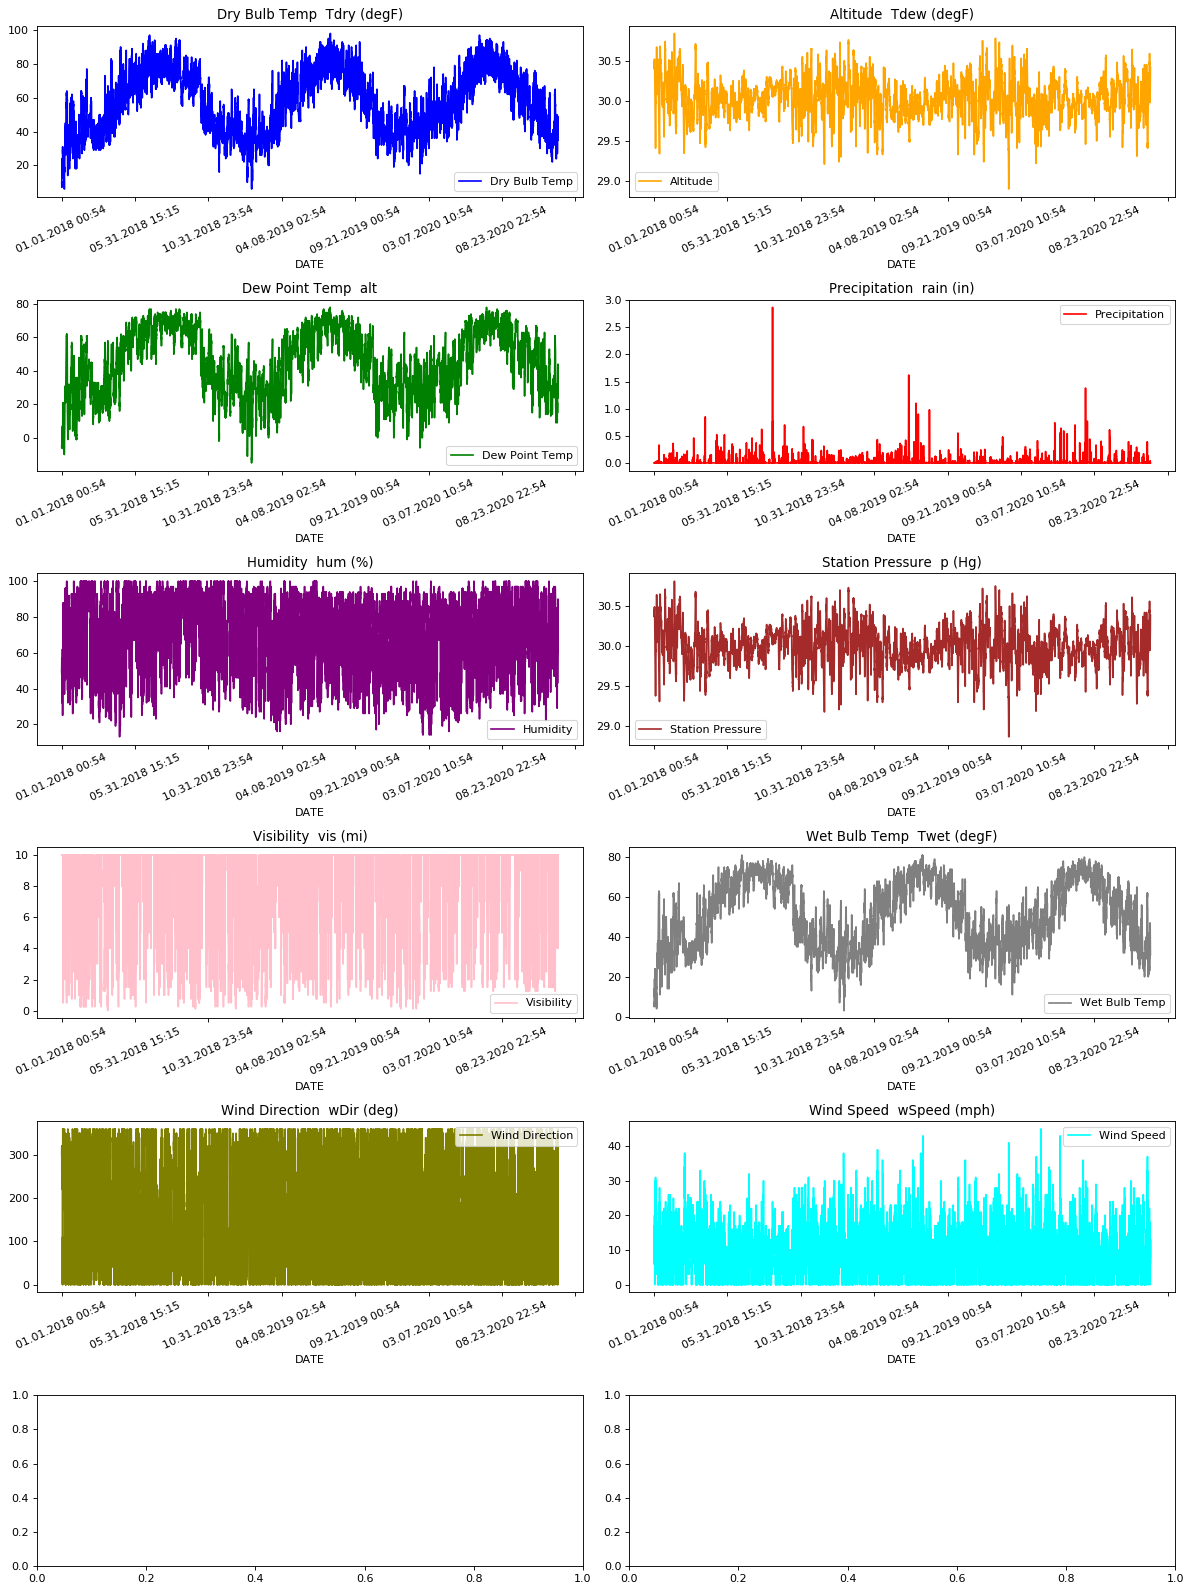

In [9]:
def show_raw_visualization(data):
    time_data = data[dateTime_key]
    fig, axes = plt.subplots(
        nrows= 6, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(keys)):
        key = keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title=keys[i] + "  " + labels[i],
            rot=25,
        )
        ax.legend([keys[i]])
    plt.tight_layout()


show_raw_visualization(df)

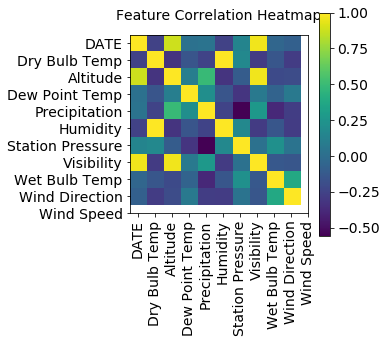

In [10]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)

In [11]:
usableFeatures = [keys[i] for i in [0,1,2,3,4,5,9]]
features = df[usableFeatures]
features.index = df[dateTime_key]
features.head()

,Dry Bulb Temp,Altitude,Dew Point Temp,Precipitation,Humidity,Station Pressure,Wind Speed
DATE,,,,,,,
01.01.2018 00:54,10.0,30.41,-5.0,0.0,50.0,30.38,6.0
01.01.2018 01:54,9.0,30.42,-5.0,0.0,52.0,30.39,7.0
01.01.2018 02:54,10.0,30.42,-6.0,0.0,48.0,30.39,8.0
01.01.2018 03:54,9.0,30.42,-6.0,0.0,50.0,30.39,7.0
01.01.2018 04:54,9.0,30.43,-6.0,0.0,50.0,30.40,9.0


In [12]:
norm = features
#norm.drop('DATE', inplace=True, axis=1)
x = norm.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
features = pd.DataFrame(x_scaled)

In [13]:
features.head()

,0,1,2,3,4,5,6
0,0.043478,0.778351,0.107527,0.0,0.425287,0.778351,0.133333
1,0.032609,0.783505,0.107527,0.0,0.448276,0.783505,0.155556
2,0.043478,0.783505,0.096774,0.0,0.402299,0.783505,0.177778
3,0.032609,0.783505,0.096774,0.0,0.425287,0.783505,0.155556
4,0.032609,0.788660,0.096774,0.0,0.425287,0.788660,0.200000


In [14]:
#create training set and testing set

split = 0.9
splitPoint = int(len(df) * split)

trainingSet = features[:splitPoint].values
testSet = features[splitPoint:].values

In [15]:
#12-hour prediction using last 48hours of data

x_train = []
y_train = []
n_future = 12
n_past = 48

for i in range(0, len(trainingSet) - n_past - n_future + 1):
 x_train.append(trainingSet[i : i + n_past, 0])
 y_train.append(trainingSet[i + n_past : i + n_past + n_future, 0])
    


In [16]:
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1))

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(units=48, return_sequences=True, input_shape = (x_train.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(units= 48, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= 48, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= 48))
model.add(Dropout(0.2))
model.add(Dense(units = n_future, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=25, batch_size=64)



C:\Users\gtray\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/25
475/475 [==============================] - 134s 280ms/step - loss: 0.0382 - accuracy: 0.0786
Epoch 2/25
475/475 [==============================] - 131s 276ms/step - loss: 0.0089 - accuracy: 0.0840
Epoch 3/25
475/475 [==============================] - 131s 275ms/step - loss: 0.0066 - accuracy: 0.1087
Epoch 4/25
475/475 [==============================] - 131s 276ms/step - loss: 0.0053 - accuracy: 0.1632
Epoch 5/25
475/475 [==============================] - 133s 279ms/step - loss: 0.0048 - accuracy: 0.1875
Epoch 6/25
475/475 [==============================] - 131s 276ms/step - loss: 0.0044 - accuracy: 0.2067
Epoch 7/25
475/475 [==============================] - 129s 271ms/step - loss: 0.0041 - accuracy: 0.2174
Epoch 8/25
475/475 [==============================] - 132s 279ms/step - loss: 0.0039 - accuracy: 0.2271
Epoch 9/25
475/475 [==============================] - 129s 272ms/step - loss: 0.0039 - accuracy: 0.2389
Epoch 10/25
475/475 [==============================] - 129s 271m

In [382]:
x_test = testSet[: n_past, 0]
y_test = testSet[n_past : n_past + n_future, 0]
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (1, x_test.shape[0], 1))

In [386]:
predicted_temperature = model.predict(x_test)
print('Predicted temperature {}'.format(predicted_temperature))
print('Real temperature {}'.format(y_test))

Predicted temperature [[0.81832886 0.8060033  0.8553636  0.90820575 0.94104636 0.9622062
  0.98222184 1.0279274  1.0144887  1.0466149  1.0514884  1.0642614 ]]
Real temperature [1.10127124 1.10127124 1.15225771 1.10127124 1.10127124 1.15225771
 1.10127124 0.99929831 0.94831184 0.89732538 0.89732538 0.89732538]


[[0.81832886 0.8060033  0.8553636  0.90820575 0.94104636 0.9622062
  0.98222184 1.0279274  1.0144887  1.0466149  1.0514884  1.0642614 ]]
